In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

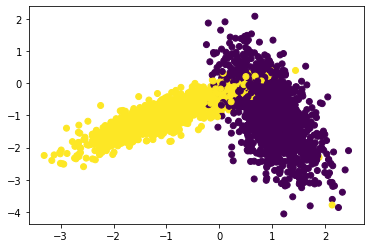

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

#Implementing Custom RandomSearchCV

    def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model


    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows

        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies

        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies

        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure

        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

    # 5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
    # 6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
    # 7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook


[2, 7, 9, 15, 23, 35, 36, 39, 44, 47]


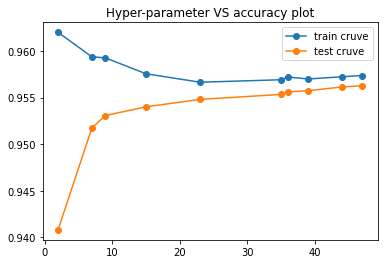

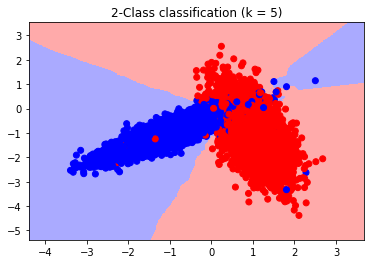

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from tqdm import tqdm
import numpy as np
# from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# print((X_train.shape))
#colors = {0:'orange', 1:'blue'}
# plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
# plt.show()


def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = []
    # x = []
    # y = []
    # x_split = []
    # y_split = []
    # x_split1 = []
    # y_split1 = []
    # params = list(np.where((np.random.randint(param_range[0],param_range[1],size = 10))/2 != 0))


    # params = np.random.randint(3,29,size = 10)     #generating random 10 intergers in the interval specified

    params = random.sample(range(1,50),10)         #generating samples #correction

    fold_split = int(len(x_train)/folds)           # calculating the size of each split



    # for i in range(folds):
        # x.append(x_train[fold_split*i:fold_split*(i+1)])
        # y.append(y_train[fold_split*i:fold_split*(i+1)])
        # x_split1.append(x_train[fold_split*i:fold_split*(i+1)])
        # y_split1.append(y_train[fold_split*i:fold_split*(i+1)])
        

    print(sorted(params))
    for k in sorted(params):                                 #for each parameter value
        # print('i : ',k)
        trainscores_folds = []
        testscores_folds  = []
        for j in range(folds):                    #looping over the splits having 1 split as test and rest all as train data

            # x_split = x_split1.copy()
            # y_split = y_split1.copy()
            # x_split.append(x_train[fold_split*i:fold_split*(i+1)])
            # y_split.append(y_train[fold_split*i:fold_split*(i+1)])
            # x_test1 = x_split.pop(folds-1-j)
            # x_train1 = x_split#[folds-1-j]
            # y_test1 = y_split.pop(folds-1-j)
            # y_train1 = y_split#[folds-1-j]
            
            start = fold_split*j                                                #getting the index of start of the chunk
            stop = fold_split*(j+1)                                             #gettinf the index of the end of the chunk
            x_fin_train = np.delete(x_train,np.arange(start,stop),0)            #deleting the chunk from the train data
            x_fin_test = x_train[start:stop]                                    #storing the chumk value as test/CV data
            y_fin_train = np.delete(y_train,np.arange(start,stop),0)
            y_fin_test = y_train[start:stop]
            
            
            classifier.n_neighbors = k                                          #setting the parameter of the KNN and the random generated integer
            classifier.fit(x_fin_train,y_fin_train)

            Y_predicted = classifier.predict(x_fin_test)
            testscores_folds.append(accuracy_score(y_fin_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))                #storing the train and test scores
        testscores.append(np.mean(np.array(testscores_folds)))
           
        
    # print(x)
    # print(params)
    # print(fold_split , len(x_split))
    return trainscores,testscores,params




classifier = KNeighborsClassifier()
param_range = [3,25]
folds = 5
trainscores,testscores,params = RandomSearchCV(X_train, y_train, classifier, param_range, folds)
# print(final)

plt.plot(sorted(params),trainscores, label='train cruve',marker='o')
plt.plot(sorted(params),testscores, label='test cruve',marker='o')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()



def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()
    
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

From the above accuracy plot we can choose the best parameter to be 23 as the train accuracy and test accuracy are quite close to each other. For k = 9, there is a huge gap b/w train and test accuracy implying the model is overfitting on train data.

In [ ]:
# np.random.random_sample()

In [4]:
# import random

In [11]:
# random.sample(range(1,25),10)